<a href="https://colab.research.google.com/github/abhinavdayal/EVA4/blob/master/S13/YOLO_train608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/abhinavdayal/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 1952 (delta 20), reused 0 (delta 0), pack-reused 1919
Receiving objects: 100% (1952/1952), 172.08 MiB | 14.65 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%%writefile setup.sh

git clone https://github.com/NVIDIA/apex
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

Writing setup.sh


In [6]:
!sh ../setup.sh

Cloning into 'apex'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6593 (delta 0), reused 0 (delta 0), pack-reused 6589
Receiving objects: 100% (6593/6593), 13.71 MiB | 4.07 MiB/s, done.
Resolving deltas: 100% (4382/4382), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-cml2ej8_
Created temporary directory: /tmp/pip-req-tracker-uff8viqn
Created requirements tracker '/tmp/pip-req-tracker-uff8viqn'
Created temporary directory: /tmp/pip-install-6kf1eyfb
Processing ./apex
  Created temporary directory: /tmp/pip-req-build-fzixn1q7
  Added file:///content/YoloV3/apex to build tracker '/tmp/pip-req-tracker-uff8viqn'
    Running setup.py (path:/

In [14]:
import time
import glob
import torch
import os
#/content/gdrive/My Drive/weights608

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


In [4]:
cd YoloV3

/content/YoloV3


In [11]:
!python train.py --data /content/YoloV3/data/gundata/custom.data --cache --epochs 300 --weights '/content/gdrive/My Drive/yolov3-spp-ultralytics.pt' --savepath '/content/gdrive/My Drive/weights4'  --cfg /content/YoloV3/cfg/yolov3-guns.cfg --single-cls

mixed precision is working
Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='/content/YoloV3/cfg/yolov3-guns.cfg', data='/content/YoloV3/data/gundata/custom.data', device='', epochs=300, evolve=False, img_size=[608], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, savepath='/content/gdrive/My Drive/weights4', single_cls=True, weights='/content/gdrive/My Drive/yolov3-spp-ultralytics.pt')
Using CUDA Apex device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-26 19:07:23.328866: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 7259.24it/s]
Caching images (0.4GB): 100% 500/500 [00

In [0]:
mkdir '/content/gdrive/My Drive/out1'

In [0]:
mkdir '/content/gdrive/My Drive/out1'
cp out_out/*.* '/content/gdrive/My Drive/out1/'

In [24]:
!python detect.py --conf-thres 0.3 --output out_out --weights '/content/gdrive/My Drive/weights4/best.pt' --source 'data/gundata/images' --names 'data/gundata/names.txt'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/gundata/names.txt', output='out_out', save_txt=False, source='data/gundata/images', view_img=False, weights='/content/gdrive/My Drive/weights4/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/652 data/gundata/images/image0001.jpeg: 256x512 1 guns, Done. (0.025s)
image 2/652 data/gundata/images/image0002.jpeg: 512x320 1 guns, Done. (0.029s)
image 3/652 data/gundata/images/image0003.jpeg: 320x512 1 guns, Done. (0.028s)
image 4/652 data/gundata/images/image0004.jpeg: 320x512 1 guns, Done. (0.027s)
image 5/652 data/gundata/images/image0005.jpeg: 384x512 1 guns, Done. (0.030s)
image 6/652 data/gundata/images/image0006.jpeg: 384x512 1 guns, Done. (0.029s)
image 7/652 data/gundata/images/image

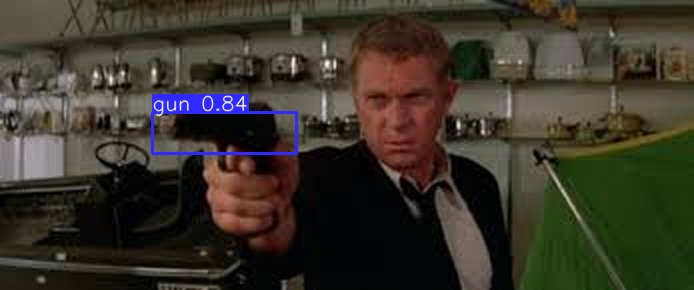

In [28]:
Image(filename='out_out/image0001.jpeg', width=600)

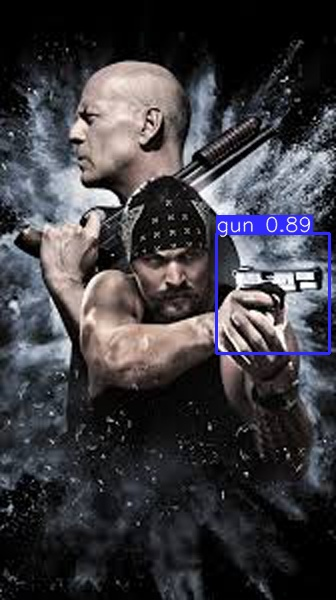

In [29]:
Image(filename='out_out/image0002.jpeg', width=600)

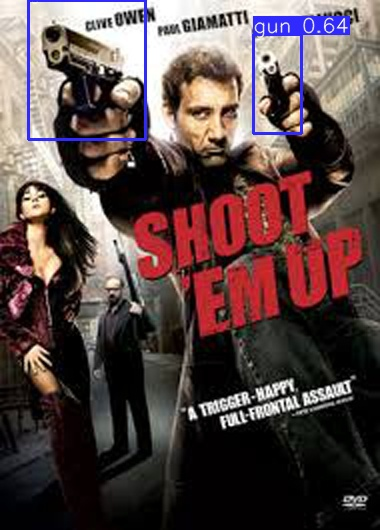

In [30]:
Image(filename='out_out/image0011.jpeg', width=600)

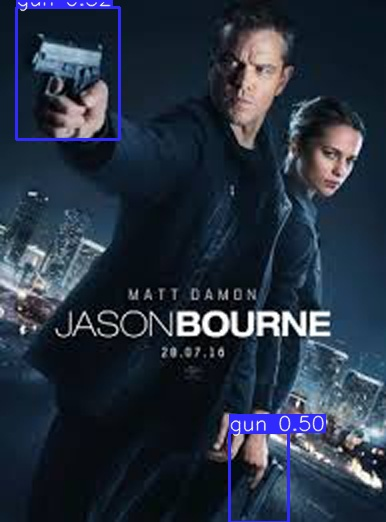

In [25]:
Image(filename='out_out/image0101.jpeg', width=600)

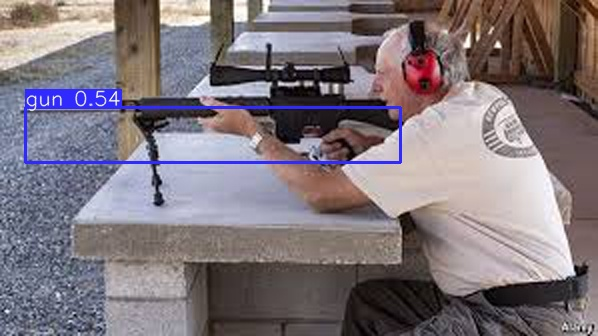

In [26]:
Image(filename='out_out/image0051.jpeg', width=600)

In [39]:
!python detect.py --conf-thres 0.1 --output vidout --weights '/content/gdrive/My Drive/weights4/best.pt' --source '/content/gdrive/My Drive/video' --names 'data/gundata/names.txt'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/gundata/names.txt', output='vidout', save_txt=False, source='/content/gdrive/My Drive/video', view_img=False, weights='/content/gdrive/My Drive/weights4/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/2270 /content/gdrive/My Drive/video/image-0001.png: 320x512 Done. (0.031s)
image 2/2270 /content/gdrive/My Drive/video/image-0002.png: 320x512 Done. (0.027s)
image 3/2270 /content/gdrive/My Drive/video/image-0003.png: 320x512 Done. (0.027s)
image 4/2270 /content/gdrive/My Drive/video/image-0004.png: 320x512 Done. (0.027s)
image 5/2270 /content/gdrive/My Drive/video/image-0005.png: 320x512 Done. (0.027s)
image 6/2270 /content/gdrive/My Drive/video/image-0006.png: 320x512 Done. (0.027s)
ima

In [0]:
mkdir '/content/gdrive/My Drive/out2'

In [0]:
cp vidout/*.* '/content/gdrive/My Drive/out2/'

In [41]:
!python detect.py --conf-thres 0.1 --output vidout2 --weights '/content/gdrive/My Drive/weights4/last.pt' --source '/content/gdrive/My Drive/video' --names 'data/gundata/names.txt'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/gundata/names.txt', output='vidout2', save_txt=False, source='/content/gdrive/My Drive/video', view_img=False, weights='/content/gdrive/My Drive/weights4/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/2780 /content/gdrive/My Drive/video/image-0001.png: 320x512 Done. (0.030s)
image 2/2780 /content/gdrive/My Drive/video/image-0002.png: 320x512 Done. (0.029s)
image 3/2780 /content/gdrive/My Drive/video/image-0003.png: 320x512 Done. (0.029s)
image 4/2780 /content/gdrive/My Drive/video/image-0004.png: 320x512 Done. (0.029s)
image 5/2780 /content/gdrive/My Drive/video/image-0005.png: 320x512 Done. (0.029s)
image 6/2780 /content/gdrive/My Drive/video/image-0006.png: 320x512 Done. (0.029s)
im

In [0]:
mkdir '/content/gdrive/My Drive/out3'

In [0]:
cp vidout2/*.* '/content/gdrive/My Drive/out3/'